In [65]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

from sklearn.model_selection import train_test_split,TimeSeriesSplit
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,LabelBinarizer,LabelEncoder,PolynomialFeatures

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostRegressor, Pool

from sklearn.linear_model import LinearRegression, Ridge, LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import lightgbm as lgb

from sklearn.svm import SVR

In [66]:
table = pd.read_csv('SberStrah.csv', sep=';',encoding ='utf8')
table.columns=['gender','age','income','kasko']
table['gender']=table['gender'].map({'Male':1,'Female':0})

In [67]:
table.head(20)

,gender,age,income,kasko
0,0,49,30000,0
1,1,38,135000,0
2,1,41,70000,0
3,0,27,127000,0
4,1,52,125000,0
5,1,49,112000,0
6,1,41,41000,0
7,0,34,125000,1
8,1,48,71000,1
9,0,32,137000,1


In [68]:
table['age'].value_counts().sort_index()

25    1344
26    1218
27    1252
28    1315
29    1287
30    1265
31    1252
32    1229
33    1286
34    1296
35    1357
36    1298
37    1254
38    1353
39    1264
40    1259
41    1281
42    1296
43    1335
44    1284
45    1334
46    1276
47    1336
48    1350
49    1270
50    1250
51    1271
52    1289
53    1255
54    1342
55    1302
Name: age, dtype: int64

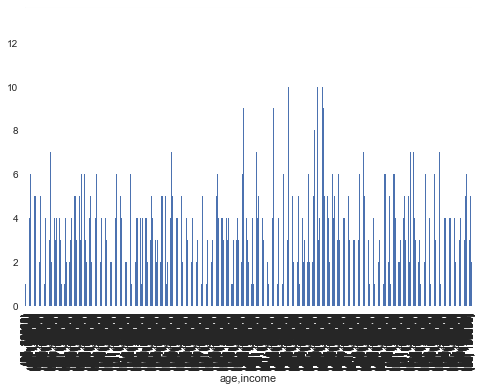

In [71]:
table[table['gender']==1].groupby(['age','income'])['income'].count().astype(int).plot.bar()
plt.show()

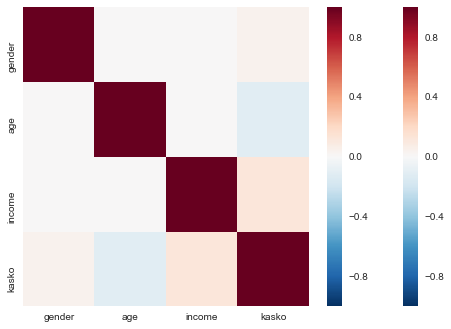

In [52]:
sns.heatmap(table.corr())
plt.show()

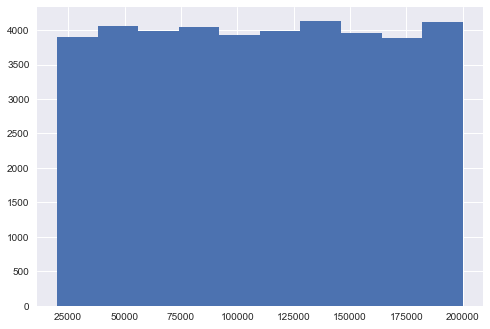

In [53]:

plt.hist(table['income'].values)
plt.show()

In [61]:
table['income'].value_counts()
# plt.show()

119000    254
41000     251
78000     250
39000     248
123000    245
107000    245
65000     245
82000     245
34000     244
137000    243
190000    242
172000    242
146000    242
198000    242
154000    241
91000     241
135000    241
31000     241
134000    240
174000    240
147000    240
76000     240
38000     238
23000     237
122000    237
60000     237
173000    235
48000     235
161000    235
124000    235
         ... 
67000     208
155000    208
33000     207
109000    207
184000    207
87000     206
54000     204
188000    204
166000    204
108000    204
27000     204
110000    203
111000    203
179000    202
159000    202
125000    201
158000    200
104000    200
181000    199
59000     199
97000     199
152000    199
45000     197
24000     196
100000    193
175000    193
186000    192
167000    190
20000     120
200000    116
Name: income, Length: 181, dtype: int64